# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Random latitude and lnogitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Nearest city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# List of City Data
city_data = []


print("Beginning Data Retrieval")
print ("-" * 15)

record_count = 1
set_count = 1
# Loop through cities
for index, city in enumerate(cities):
    # Group cities in sets of 50
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | caxito
Processing Record 2 of Set 1 | manggar
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | kulhudhuffushi
Processing Record 10 of Set 1 | abapo
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | puerto colombia
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | sao gabriel da cachoeira
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | dongsheng
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | rikitea


Processing Record 36 of Set 4 | labuhan
Processing Record 37 of Set 4 | namibe
Processing Record 38 of Set 4 | caceres
Processing Record 39 of Set 4 | alexandria
Processing Record 40 of Set 4 | lakatoro
Processing Record 41 of Set 4 | mushie
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | rodniki
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | inirida
Processing Record 46 of Set 4 | shelburne
Processing Record 47 of Set 4 | podgornoye
Processing Record 48 of Set 4 | penzance
Processing Record 49 of Set 4 | ritchie
Processing Record 0 of Set 5 | chimbote
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | colchester
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | gurskoye
City not found. Skipping ...
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping ...
Processing Record 8 of Set 5 | vostok
Proce

Processing Record 24 of Set 8 | tawkar
City not found. Skipping ...
Processing Record 25 of Set 8 | tupik
Processing Record 26 of Set 8 | prince rupert
Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | alofi
Processing Record 29 of Set 8 | ormara
Processing Record 30 of Set 8 | kihei
Processing Record 31 of Set 8 | port hardy
Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | molteno
Processing Record 34 of Set 8 | tutoia
Processing Record 35 of Set 8 | kamenskoye
City not found. Skipping ...
Processing Record 36 of Set 8 | vaitupu
City not found. Skipping ...
Processing Record 37 of Set 8 | batemans bay
Processing Record 38 of Set 8 | yulara
Processing Record 39 of Set 8 | alamosa
Processing Record 40 of Set 8 | akyab
Processing Record 41 of Set 8 | north platte
Processing Record 42 of Set 8 | taburi
City not found. Skipping ...
Processing Record 43 of Set 8 | whitehorse
Processing Record 44 of Set 8 | plettenberg bay
Processing Record 45 of Se

Processing Record 11 of Set 12 | surgana
Processing Record 12 of Set 12 | vila franca do campo
Processing Record 13 of Set 12 | wawa
Processing Record 14 of Set 12 | biltine
Processing Record 15 of Set 12 | sao joao da barra
Processing Record 16 of Set 12 | adilcevaz
Processing Record 17 of Set 12 | comodoro rivadavia
Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | lakes entrance
Processing Record 20 of Set 12 | lulea
Processing Record 21 of Set 12 | palana
Processing Record 22 of Set 12 | cape coast
Processing Record 23 of Set 12 | naron
Processing Record 24 of Set 12 | tweed
Processing Record 25 of Set 12 | rancho cucamonga
Processing Record 26 of Set 12 | bethanien
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | goba
Processing Record 29 of Set 12 | oktyabrskoye
Processing Record 30 of Set 12 | colac
Processing Record 31 of Set 12 | bolungarvik
City not found. Skipping ...
Processing Record 32 of Set 12 | bereda
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Windspeed     588
Country       588
Date          588
dtype: int64

In [5]:
# City Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,caxito,-8.5785,13.6643,73.81,99,87,2.57,AO,1650681029
1,manggar,-2.8833,108.2667,86.92,66,47,7.72,ID,1650681029
2,mahebourg,-20.4081,57.7000,75.49,64,40,11.50,MU,1650681030
3,fortuna,40.5982,-124.1573,55.65,82,0,11.50,US,1650681030
4,thompson,55.7435,-97.8558,33.96,60,40,0.00,CA,1650681030


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

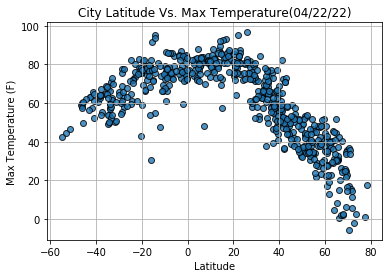

In [6]:
# Build scatter plot
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

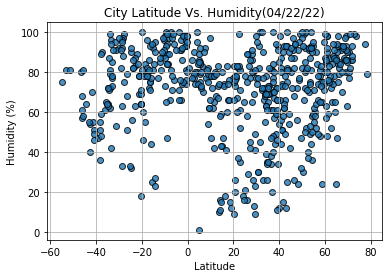

In [7]:
# Scatter plot latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Laitude vs. Cloudiness Plot

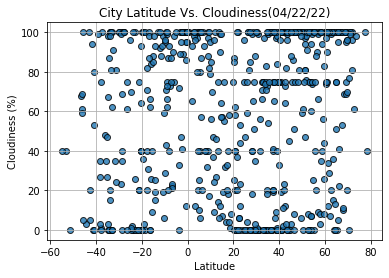

In [8]:
# Scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [9]:
# Linear Regression function
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

The r-value is: -0.888951105830645


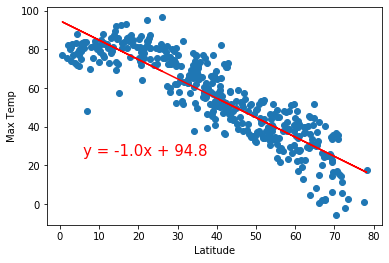

In [11]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,25))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6458343660052063


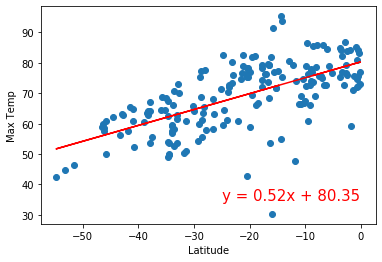

In [12]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (-25,35))

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 

The r-value is: 0.2096258724942402


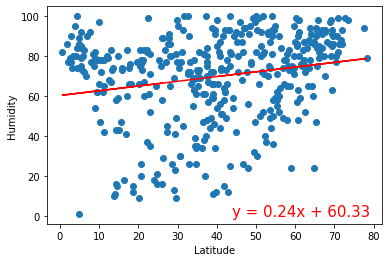

In [13]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (44,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3700119918970161


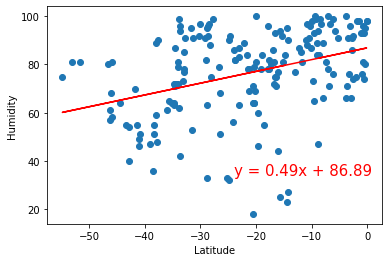

In [14]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-24,34))

#### Northern Hemisphere - Cloudiness (%) vs. Laititude Linear Regression

The r-value is: 0.15694856002957122


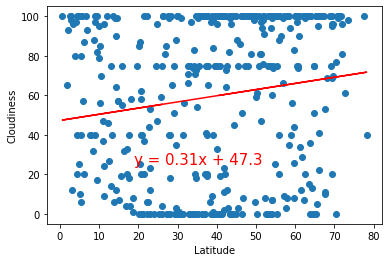

In [15]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (19,25))

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28508006453231033


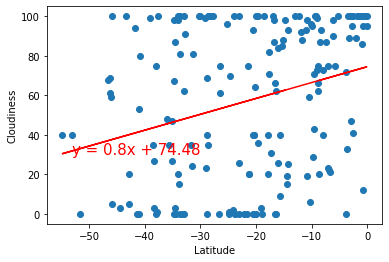

In [16]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-53,30))

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03431877479332996


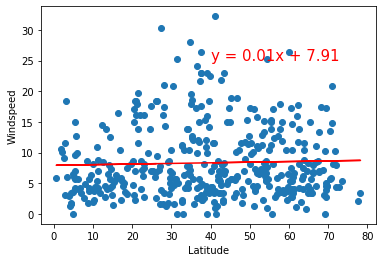

In [17]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plt.ylabel("Windspeed")
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3357974541428699


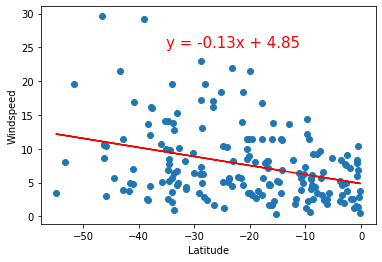

In [18]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plt.ylabel("Windspeed")
plot_linear_regression(x_values,y_values, 'Windspeed', (-35,25))